# CSCI 39543 Project: Reviews Sentiment Analysis


## 1. Collecting Data

### 1.1 Dataset Title: 

    amazon_reviews Data_Set
    
### 1.2 Dataset Source: 
    Amazon AWS 
    https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt
    
### 1.3 Dataset Description:
    
    This dataset contains more than 6M consumer reviews on different products. This data can be used to improve customer experience, optimize product offerings, and identify areas of improvement. The data includes customer reviews, ratings, and other related information. It can also include customer demographics, purchase history, and other related data.

### 1.4 Project Objective:
    The objective of this project is to find various trends and patterns and create useful insights for the best quality product. We must determine whether the review is favorable or unfavorable. A grade of four or five might be seen as a positive review, one or two as a negative review, and three as neutral. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.

## 2. Exploratory Data Analysis (EDA):

### 2.1 Data:

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re, string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [2]:
df = pd.read_csv('amazon_reviews.tsv', sep='\t', quoting = 3)  

In [3]:
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,53096384,R63J84G1LOX6R,1563890119,763187671,The Sandman Vol. 1: Preludes and Nocturnes,Books,4,0,1,N,N,ignore the review below,this is the first 8 issues of the series. it i...,1995-08-13
1,US,53096399,R1BALOA11Z06MT,1559947608,381720534,The 22 Immutable Laws of Marketing,Books,4,0,0,N,N,awesome,I've always been partial to immutable laws. Th...,1995-08-17
2,US,53096332,R1LLAY5W5PZUS4,0671701800,860650224,Contact,Books,5,1,2,N,N,Read the book. It's good.,This is a book about first contact with aliens...,1995-08-30
3,US,53096335,R3R9VTJ82FXECQ,0425132153,624269601,Good Omens,Books,5,0,0,N,N,Funniest book ever written about the Anti-Christ,This is quite possibly *the* funniest book I h...,1995-09-11
4,US,51747709,R1P5J3FNBWTFXY,0517122707,161411385,A Confederacy of Dunces,Books,5,0,0,N,N,A winner that didn't last. Only a mothers love...,The story behind the book is almost better tha...,1995-10-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931161,US,52303,R16DAHIWNXFOYI,B00QW8TYWO,828652896,Crossy Road,Mobile_Apps,5,0,0,N,Y,Five Stars,very fun game,2015-08-31
6931162,US,565563,R1DS6EBGAEJDB5,B00PSLQYWE,156264553,Downton Abbey Season 5,Digital_Video_Download,5,0,0,N,Y,Five Stars,Great,2015-08-31
6931163,US,254421,R3HEHT8JUA33VW,B000FC1LOC,354573823,My Sister's Keeper: A Novel (Wsp Readers Club),Digital_Ebook_Purchase,5,0,0,N,N,and she has beautifully written and explored t...,"This is my first book from Jodi, and she has b...",2015-08-31
6931164,US,146004,RVK4I33L93536,B008T4HHWS,599809487,Scent of a Woman,Digital_Video_Download,5,0,0,N,N,Like this!,Good movie!,2015-08-31


In [4]:
df.shape

(6931166, 15)

In [5]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6931166 entries, 0 to 6931165
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int64(5), object(10)
memory usage: 793.2+ MB


### 2.2 Preprocessing the Data
    Dropping unwanted features, duplicated values, and removing null values,. In addition to converting the 
    review_date type from object to datetime

In [7]:
# droping unwanted features 
df = df.drop(['marketplace', 'customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 
              'vine', 'verified_purchase', 'helpful_votes', 'total_votes', ], axis=1)

In [8]:
df

,product_category,star_rating,review_headline,review_body,review_date
0,Books,4,ignore the review below,this is the first 8 issues of the series. it i...,1995-08-13
1,Books,4,awesome,I've always been partial to immutable laws. Th...,1995-08-17
2,Books,5,Read the book. It's good.,This is a book about first contact with aliens...,1995-08-30
3,Books,5,Funniest book ever written about the Anti-Christ,This is quite possibly *the* funniest book I h...,1995-09-11
4,Books,5,A winner that didn't last. Only a mothers love...,The story behind the book is almost better tha...,1995-10-17
...,...,...,...,...,...
6931161,Mobile_Apps,5,Five Stars,very fun game,2015-08-31
6931162,Digital_Video_Download,5,Five Stars,Great,2015-08-31
6931163,Digital_Ebook_Purchase,5,and she has beautifully written and explored t...,"This is my first book from Jodi, and she has b...",2015-08-31
6931164,Digital_Video_Download,5,Like this!,Good movie!,2015-08-31


In [9]:
df.shape

(6931166, 5)

In [10]:
# converting review_date type from object to date_time
df['review_date'] = pd.to_datetime(df['review_date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6931166 entries, 0 to 6931165
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   product_category  object        
 1   star_rating       int64         
 2   review_headline   object        
 3   review_body       object        
 4   review_date       datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 264.4+ MB


In [12]:
df.loc[df.duplicated()]

,product_category,star_rating,review_headline,review_body,review_date
15974,Music,5,Cult Worship,"The first time I heard Electric, I was a fresh...",1999-02-06
20525,Music,1,Buy Her Second Album Instead!,This is awful! Please turn it off! Get a voice...,1999-04-02
24886,Video DVD,1,Very disappointed.,"Of all the billions, I am shocked that they ha...",1999-05-21
29716,Music,5,Simply an excellent CD,One of my all time top ten albums. Almost all...,1999-07-08
29718,Music,5,Simply an excellent CD,One of my all time top ten albums. Almost all...,1999-07-08
...,...,...,...,...,...
6931089,Mobile_Apps,5,Five Stars,Love it,2015-08-31
6931095,Digital_Video_Download,5,Five Stars,love it,2015-08-31
6931127,Digital_Video_Download,5,Five Stars,Loved it!,2015-08-31
6931150,Digital_Video_Download,5,Five Stars,Great,2015-08-31


In [13]:
# dropping duplicated values
df = df.drop_duplicates()

In [14]:
df.loc[df.duplicated()]

,product_category,star_rating,review_headline,review_body,review_date


In [15]:
df.isnull().sum()

product_category     0
star_rating          0
review_headline     70
review_body         74
review_date          0
dtype: int64

In [16]:
# Removing null values
df = df.dropna()

In [17]:
df.isnull().sum()

product_category    0
star_rating         0
review_headline     0
review_body         0
review_date         0
dtype: int64

In [18]:
df.shape

(6785736, 5)

### 2.3 Data Visualization: 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


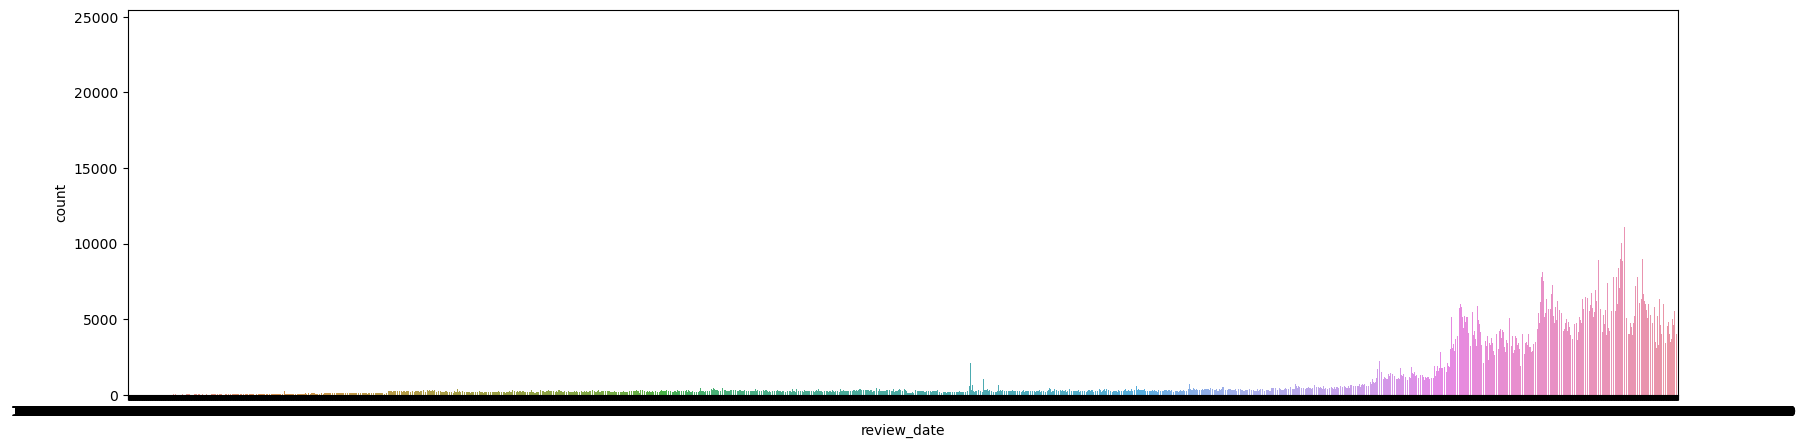

In [23]:
plt.figure(figsize=(20, 5))
sns.countplot(df['review_date'])
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


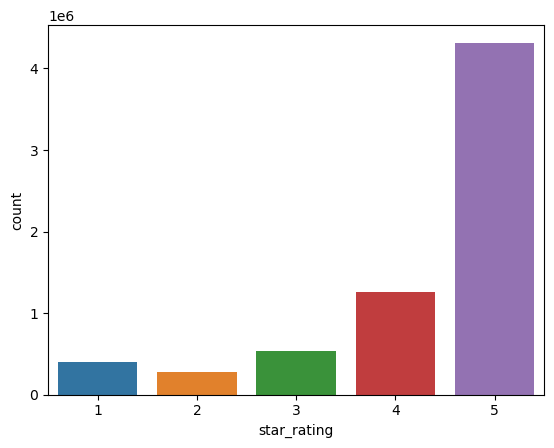

In [20]:
sns.countplot(df['star_rating'])
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


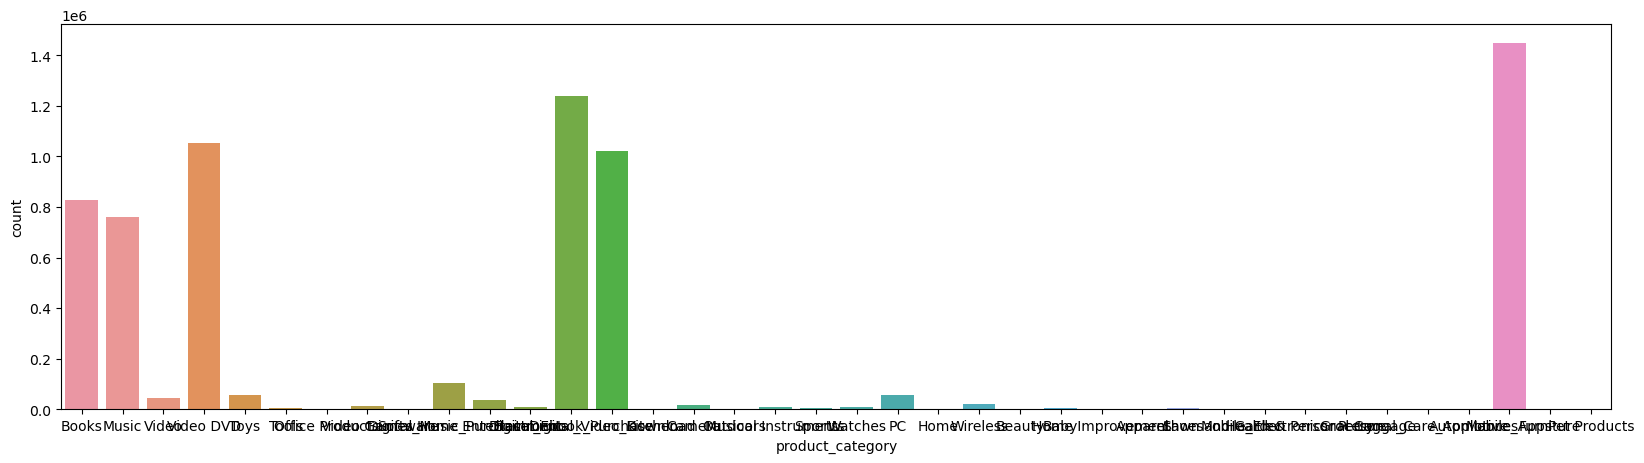

In [24]:
plt.figure(figsize=(20, 5))
sns.countplot(df['product_category'])
plt.show()

In [22]:
date_counts = df['product_category'].value_counts()
date_counts

Mobile_Apps                 1449552
Digital_Ebook_Purchase      1237789
Video DVD                   1055122
Digital_Video_Download      1020265
Books                        828812
Music                        762208
Digital_Music_Purchase       106374
PC                            56945
Toys                          56806
Video                         46302
Home Entertainment            36451
Wireless                      22735
Camera                        16953
Video Games                   15457
Electronics                   11450
Musical Instruments           10952
Watches                       10543
Tools                          7505
Shoes                          7377
Baby                           5896
Sports                         4135
Home Improvement               3719
Outdoors                       3195
Office Products                2310
Home                           2007
Kitchen                        1843
Lawn and Garden                1212
Health & Personal Care      

In [25]:
drop_categories = ['Mobile_Apps', 'Digital_Video_Download','Music', 'Digital_Ebook_Purchase']
mask_categories = ~df['product_category'].isin(drop_categories)
df = df[mask_categories]

In [27]:
target_categories = ['Video DVD','Books']

# Create a boolean mask for the target categories
mask = df['product_category'].isin(target_categories)

# Select 85% of the reviews in the target categories to drop randomly
drop_indices = df[mask].sample(frac=0.85, random_state=42).index

# Drop the selected rows
df = df.drop(drop_indices)

In [29]:
date_counts = df['product_category'].value_counts()
date_counts

Video DVD                   158310
Books                       124280
Digital_Music_Purchase      106374
PC                           56945
Toys                         56806
Video                        46302
Home Entertainment           36451
Wireless                     22735
Camera                       16953
Video Games                  15457
Electronics                  11450
Musical Instruments          10952
Watches                      10543
Tools                         7505
Shoes                         7377
Baby                          5896
Sports                        4135
Home Improvement              3719
Outdoors                      3195
Office Products               2310
Home                          2007
Kitchen                       1843
Lawn and Garden               1212
Health & Personal Care        1071
Automotive                     221
Mobile_Electronics             184
Apparel                        122
Luggage                         78
Software            

In [30]:
date_counts = df['star_rating'].value_counts()
date_counts

5    472977
4    114890
3     50648
1     45444
2     30619
Name: star_rating, dtype: int64

In [31]:
mask_5 = df['star_rating'] == 5
mask_4 = df['star_rating'] == 4
# Select 80% of the 5-star reviews to drop randomly
drop_indices_5 = df[mask_5].sample(frac=0.8, random_state=42).index

# Select 50% of the 4-star reviews to drop randomly
drop_indices_4 = df[mask_4].sample(frac=0.5, random_state=42).index

# Drop the selected rows
df = df.drop(drop_indices_5)

# Drop the selected rows
df = df.drop(drop_indices_4)

In [32]:
date_counts = df['star_rating'].value_counts()
date_counts

5    94595
4    57445
3    50648
1    45444
2    30619
Name: star_rating, dtype: int64

In [33]:
df.shape

(278751, 5)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


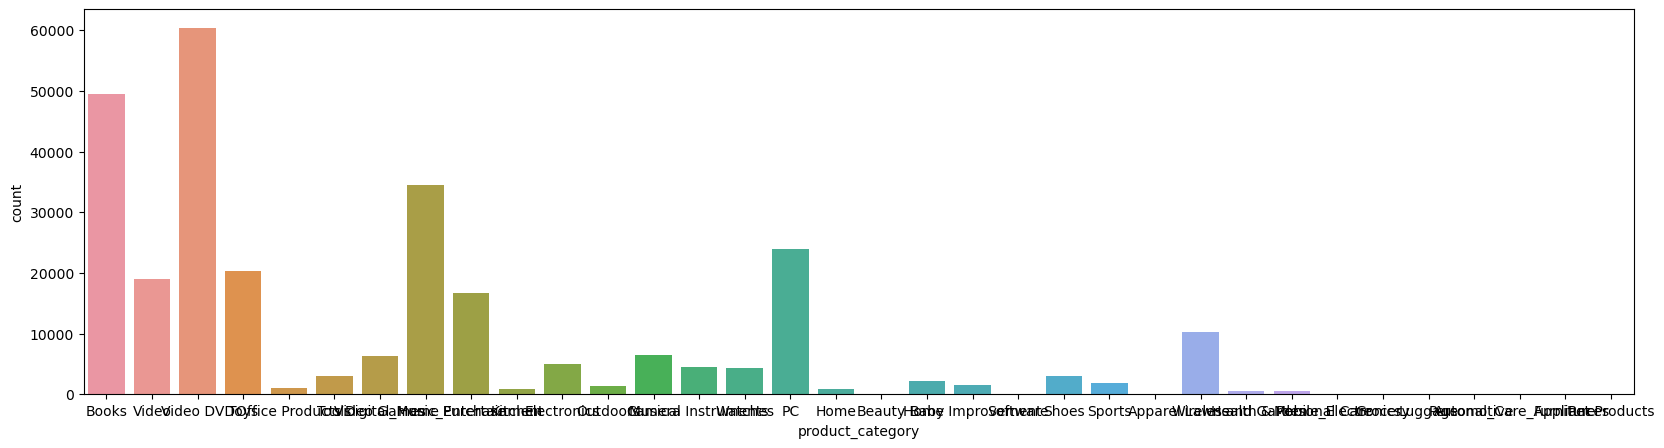

In [35]:
plt.figure(figsize=(20, 5))
sns.countplot(df['product_category'])
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


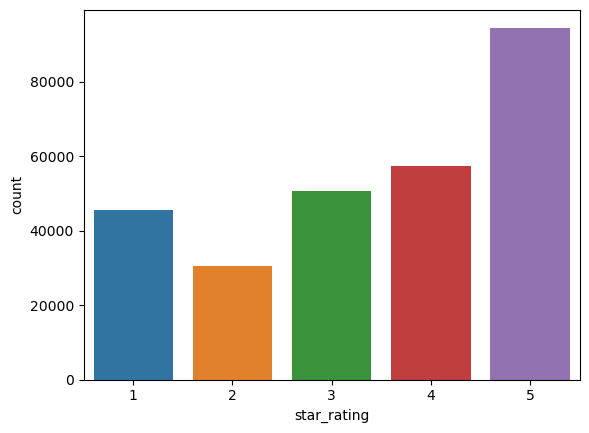

In [36]:
sns.countplot(df['star_rating'])
plt.show()

In [38]:
df

,product_category,star_rating,review_headline,review_body,review_date
952664,Books,4,Didn't see the end coming,"I really enjoyed the book, but wow was I surpr...",2010-01-01
952680,Video Games,5,Lets get ready to RUMBLE!,Awesome controller but wish Sony had this on d...,2010-01-01
952688,Video DVD,3,somewhat dissappointing ending,I found the first 2/3 of the movie very entert...,2010-01-01
952709,Books,1,Don't waste your time,What a smarmy and mean-spirited book . . . Ve...,2010-01-01
952875,Digital_Music_Purchase,4,"Strange and good, but not really rap.",I bought this CD kind of on a whim. And ... it...,2010-01-01
...,...,...,...,...,...
6931069,Video DVD,4,Four Stars,Haunting,2015-08-31
6931082,Home Improvement,5,Great Size!,My granddaughter loves it! Love the size. High...,2015-08-31
6931100,Toys,5,Five Stars,very good quality one of the best looking blad...,2015-08-31
6931105,Toys,4,Fun classic for solo as well as co-op play,Worthy followup to the classic game. A D&D-lit...,2015-08-31


In [37]:
# Define the date before which to drop the rows
drop_date = pd.to_datetime('2010-01-01')

# Select the rows that have a review date before the drop date
drop_mask = df['review_date'] < drop_date

# Drop the selected rows
df = df.drop(index=df[drop_mask].index)

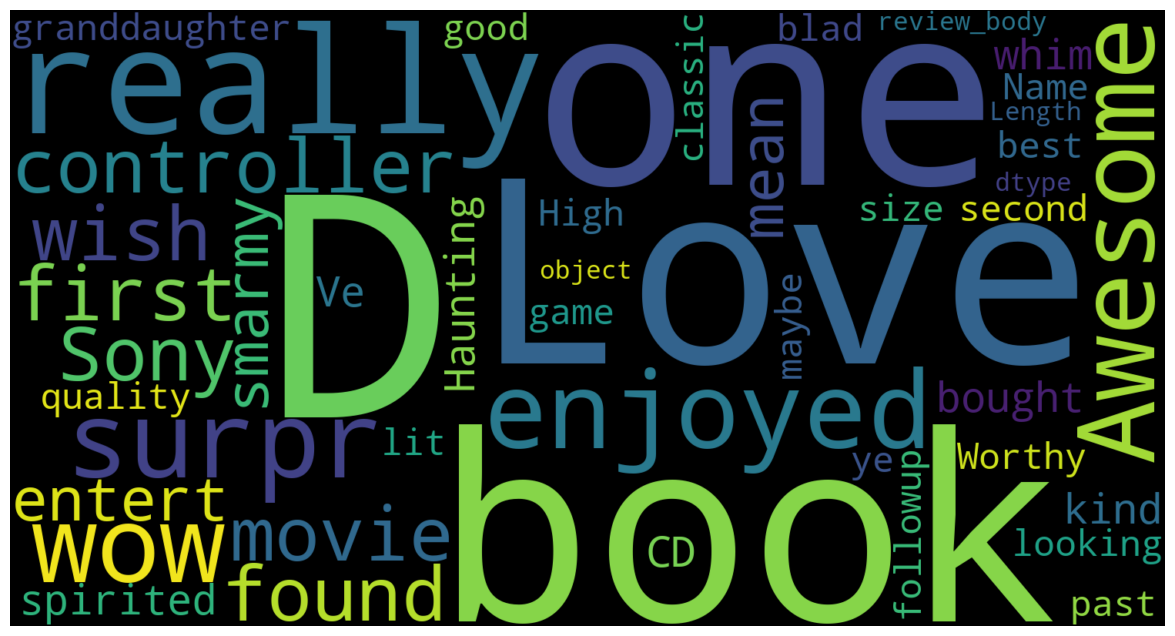

In [39]:
txt = df['review_body']
plt.figure(figsize=(20,8))

wordcloud = WordCloud(
    width = 1500,
    height = 800,
    background_color = 'black').generate(str(txt))

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

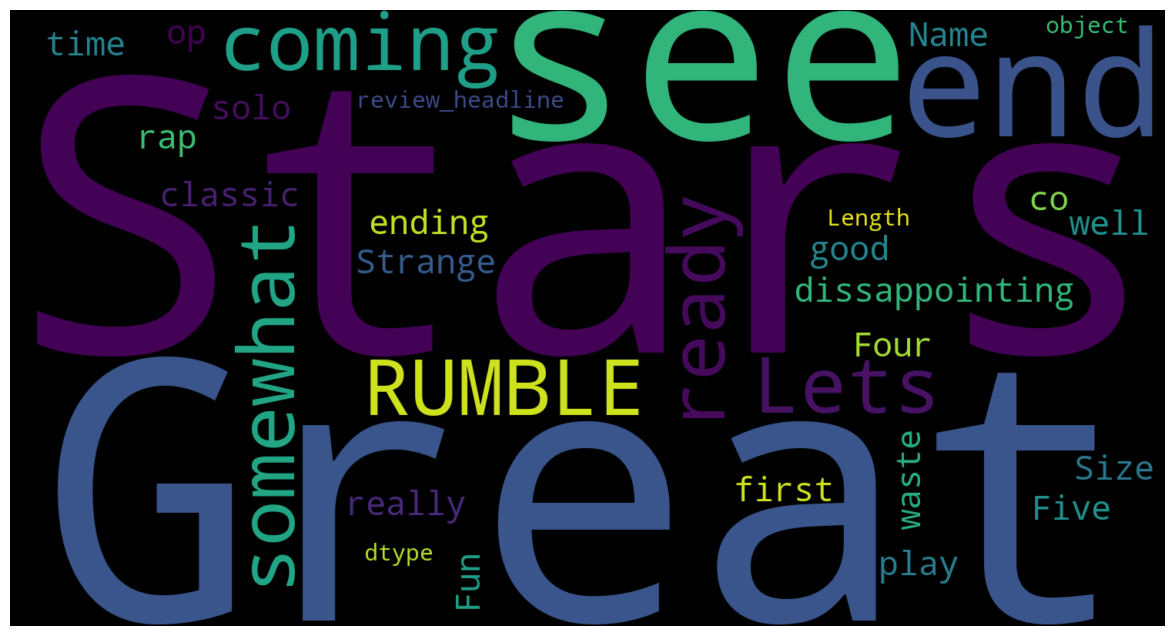

In [40]:
txt = df['review_headline']
plt.figure(figsize=(20,8))

wordcloud = WordCloud(
    width = 1500,
    height = 800,
    background_color = 'black').generate(str(txt))

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

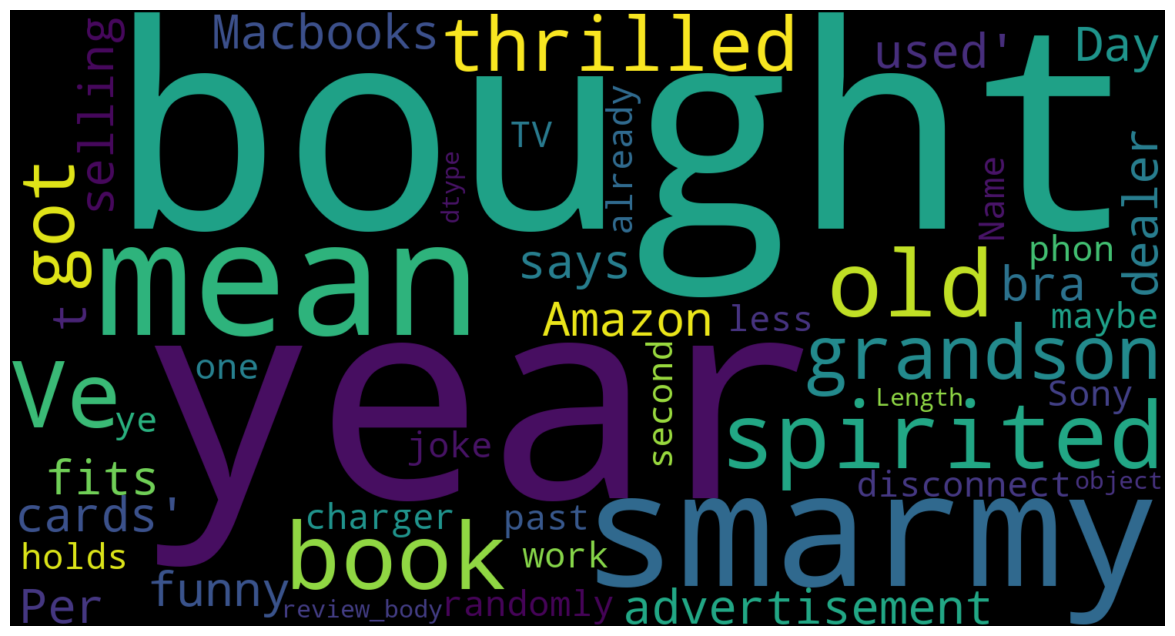

In [41]:
review_positive = df[df['star_rating']== 1]
txt = review_positive['review_body']
plt.figure(figsize=(20,8))

wordcloud = WordCloud(
    width = 1500,
    height = 800,
    background_color = 'black').generate(str(txt))

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

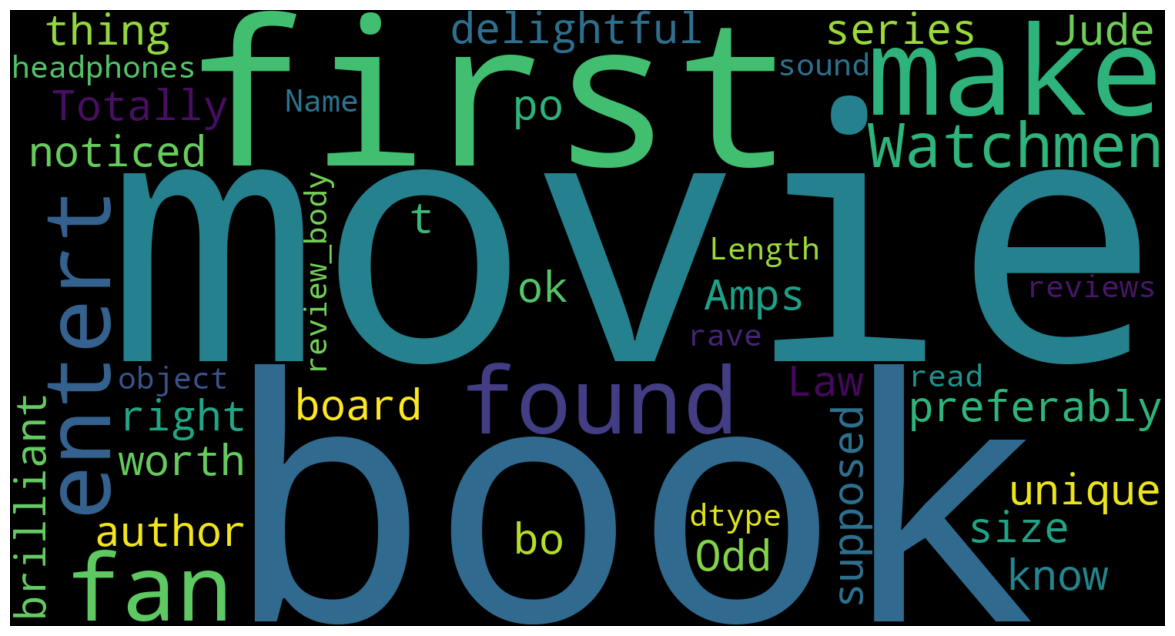

In [42]:
review_positive = df[df['star_rating']== 3]
txt = review_positive['review_body']
plt.figure(figsize=(20,8))

wordcloud = WordCloud(
    width = 1500,
    height = 800,
    background_color = 'black').generate(str(txt))

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

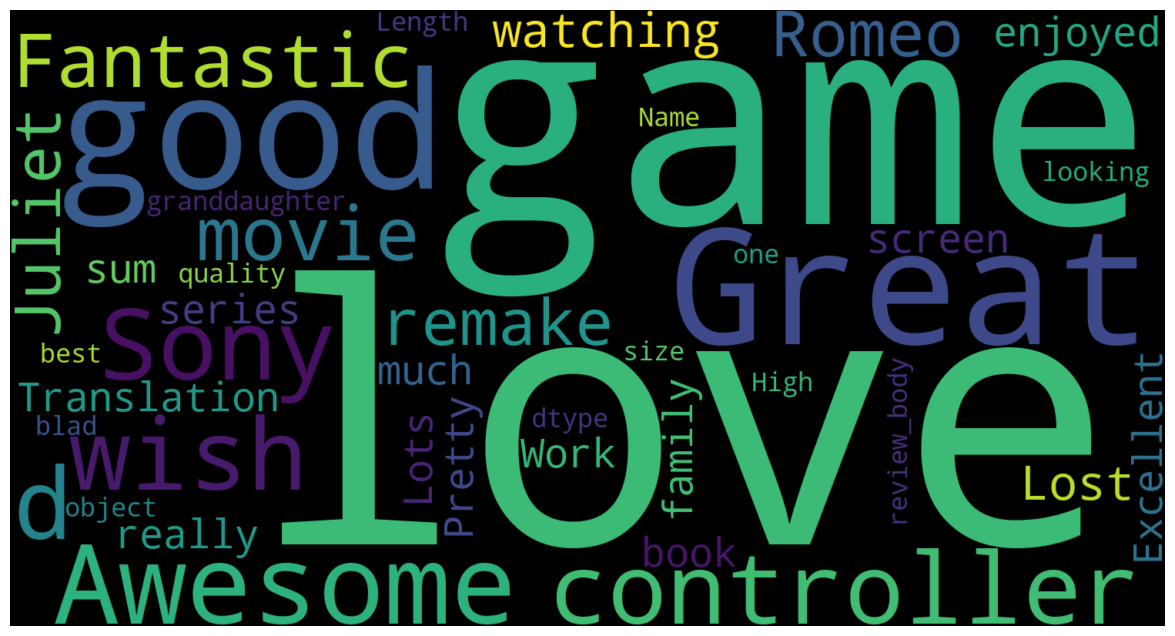

In [43]:
review_positive = df[df['star_rating']== 5]
txt = review_positive['review_body']
plt.figure(figsize=(20,8))

wordcloud = WordCloud(
    width = 1500,
    height = 800,
    background_color = 'black').generate(str(txt))

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 3. Creating Baseline Model

In [44]:
final_data = df[['product_category','review_headline','review_body', 'star_rating']]
final_data.head()

,product_category,review_headline,review_body,star_rating
952664,Books,Didn't see the end coming,"I really enjoyed the book, but wow was I surpr...",4
952680,Video Games,Lets get ready to RUMBLE!,Awesome controller but wish Sony had this on d...,5
952688,Video DVD,somewhat dissappointing ending,I found the first 2/3 of the movie very entert...,3
952709,Books,Don't waste your time,What a smarmy and mean-spirited book . . . Ve...,1
952875,Digital_Music_Purchase,"Strange and good, but not really rap.",I bought this CD kind of on a whim. And ... it...,4


In [45]:
def clean_text(text):
    # Converting to lowercase
    text = text.lower()
    
    # Removing URLs
    text = re.sub(r'https?://\S+', '', text)
    
    # Removing punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if not token in stop_words]
    
    # Joining the tokens to form the cleaned text
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [46]:
final_data['review_body'] = final_data['review_body'].apply(clean_text)
final_data['review_body'].head()

/var/folders/c2/p9tys56j6dx0n3gd93m0lcs00000gn/T/ipykernel_16829/2998761147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['review_body'] = final_data['review_body'].apply(clean_text)


952664    really enjoyed book wow surprised end would pr...
952680    awesome controller wish sony day 1 ps3s launch...
952688    found first 23 movie entertaining interesting ...
952709    smarmy meanspirited book personal reviews litt...
952875    bought cd kind whim really rap cd whenever kid...
Name: review_body, dtype: object

In [47]:
final_data['review_headline'] = final_data['review_headline'].apply(clean_text)
final_data['review_headline'].head()

/var/folders/c2/p9tys56j6dx0n3gd93m0lcs00000gn/T/ipykernel_16829/1813089545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['review_headline'] = final_data['review_headline'].apply(clean_text)


952664              didnt see end coming
952680             lets get ready rumble
952688    somewhat dissappointing ending
952709                   dont waste time
952875           strange good really rap
Name: review_headline, dtype: object

In [48]:
x = final_data['review_body']
y = final_data['star_rating']

In [49]:
# Creating Document Term Matrix using TFIDFVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
x = vectorizer.fit_transform(x)
x

<222669x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 6166383 stored elements in Compressed Sparse Row format>

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)

### Logistic Regression

In [51]:
logRegr = LogisticRegression()
logRegr.fit(x_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
y_pred = logRegr.predict(x_test)

In [53]:
accuracy_score(y_test, y_pred)

0.5498720079040733

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.59      0.68      0.63      7018
           2       0.35      0.15      0.21      4639
           3       0.42      0.42      0.42      7959
           4       0.44      0.31      0.37      9239
           5       0.64      0.82      0.72     15679

    accuracy                           0.55     44534
   macro avg       0.49      0.47      0.47     44534
weighted avg       0.52      0.55      0.52     44534



### Random Forest

In [55]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [56]:
rfc_y_pred = rfc.predict(x_test)

In [57]:
accuracy_score(y_test, rfc_y_pred)

0.5185925360398796

In [58]:
print(classification_report(y_test, rfc_y_pred))

              precision    recall  f1-score   support

           1       0.53      0.67      0.59      7018
           2       0.32      0.02      0.04      4639
           3       0.39      0.36      0.38      7959
           4       0.41      0.24      0.30      9239
           5       0.58      0.84      0.69     15679

    accuracy                           0.52     44534
   macro avg       0.45      0.43      0.40     44534
weighted avg       0.48      0.52      0.47     44534

